# Task 1.2: Apply Quantum Operations (Part 2)
## Objective 1b: Advanced & Algorithmic Circuit Library

**Overview:**
This notebook covers high-level algorithmic circuits used in Variational Algorithms, Machine Learning, and Optimization.

- **Advanced Arithmetic:** Comparators, Reciprocals.
- **Particular Quantum Circuits:** Grover Operator, Phase Estimation and others
- **N-Local Circuits:** EfficientSU2, RealAmplitudes (Ansatzes).
- **Oracles & Templates:** Tools for specific algorithms like Grover's.

### Advanced Arithmetic

#### **Advanced Building Blocks: Other Arithmetic Functions**

Qiskit's circuit library contains a variety of specialized arithmetic components. These gates and circuits are essential for building quantum algorithms, these functions exist in two forms: abstract `Gate` representations, which describe the mathematical operation for the transpiler to optimize, and concrete `QuantumCircuit` implementations, which are ready-to-use algorithmic blocks.

**Gate Representation**

- **ExactReciprocalGate**:	Implements an exact reciprocal function `f(x) = 1/x`.
- **IntegerComparatorGate**:	Perform a `≥` or `<` on a qubit register against a classical integer.
- **QuadraticFormGate**:	Implements a quadratic form on binary variables encoded in qubit registers.
- **WeightedSumGate**:	A gate to compute the weighted sum `Σ(wᵢ -**xᵢ)` of qubit registers, each variable is multiplied by a specific weight.

**QuantumCircuit Representation** 

- **ExactReciprocal**:	Exact reciprocal `QuantumCircuit` implmentation
- **IntegerComparator**:	Integer Comparator `QuantumCircuit` implmentation.
- **QuadraticForm**:	Quadratic form `QuantumCircuit` implmentation.
- **WeightedAdder**:	Weighted sum `QuantumCircuit` implmentation.

In [ ]:
from qiskit.circuit.library import IntegerComparator
from qiskit import ClassicalRegister

# Example 1: Integer Comparator as a Gate
# Compare if a 2-qubit number (0-3) is < 3 
qc = IntegerComparator(2, 3, geq=False)
qc.add_register(ClassicalRegister(1))
#Result is stored in the third qubit (flips if condition is true)
#Output is 0 < 3  => True , third qubit should be flipped
qc.measure(2,0)
print("Integer Comparator Circuit:")
qc.draw('mpl')

In [ ]:
from qiskit.circuit.library import WeightedAdder
from qiskit import QuantumCircuit

# Example 2: Weighted Adder as a Circuit
# Compute weighted sum: 2*x0 + 3*x1
weights = [2, 3]


weighted_adder = WeightedAdder(2, weights=weights)
qc = QuantumCircuit(weighted_adder.num_qubits, 3)
# setup input to represent x1=1 (qubit 1) and x0=0 (qubit 0)
qc.x(1)
# append the weighted adder circuit
qc.append(weighted_adder, range(weighted_adder.num_qubits))
#Output is stored in 3-qubit sum register in qubits 2,3,4
#Output is 3-**1 + 2*0 = 3
qc.measure(range(2, 5), range(3))
print("Weighted Adder Circuit:")
qc.draw('mpl')

In [ ]:
from qiskit import  transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

sim_ideal = AerSimulator()
result = sim_ideal.run(transpile(qc , sim_ideal),shots=1000).result()
#print(result)
counts = result.get_counts(0)
print("Measurement Output:", counts)
plot_histogram(counts, title='qc')


### Particular Quantum Circuits

Specialized circuits for specific quantum algorithms and applications, these functions exist also `Gate` and `QuantumCircuit` representations


- **fourier_checking** :	Fourier checking algorithm circuit .
- **hidden_linear_function** :	Circuit to solve the hidden linear function problem.
- **iqp** :	Instantaneous quantum polynomial time (IQP) circuit.
- **random_iqp** :	Random instantaneous quantum polynomial time (IQP) circuit.
- **quantum_volume** :	Quantum volume model circuit used to measure the Quantum Volume metric.
- **phase_estimation** :	Phase Estimation circuit to estimate the phase `ϕ` of an eigenvalue $e^{2\pi i\phi}$ of a unitary operator U.
- **grover_operator** :	Construct the Grover operator in Grover's search algorithm
- **unitary_overlap** :	Circuit that returns the overlap between two unitaries U2†U1.
- **GraphStateGate** :	Gate representing a graph state.
- **PauliEvolutionGate** :	Time-evolution of an operator consisting of Pauli gates.
- **HamiltonianGate** :	Class for representing evolution by a Hamiltonian operator as a gate.

**QuantumCircuit Representation**

- **FourierChecking** :	Fourier checking `QuantumCircuit` implmentation.
- **GraphState** :	Graph state `QuantumCircuit` implmentation.
- **HiddenLinearFunction** :	Hidden Linear function `QuantumCircuit` implmentation.
- **IQP** :	Instantaneous quantum polynomial (IQP) `QuantumCircuit` implmentation.
- **QuantumVolume** :	Quantum volume model `QuantumCircuit` implmentation.
- **PhaseEstimation** :	Phase Estimation `QuantumCircuit` implmentation.
- **GroverOperator** :	Grover operator `QuantumCircuit` implmentation.
- **UnitaryOverlap** :	Unitary overlap `QuantumCircuit` implmentation​.

In [ ]:
from qiskit.circuit.library import quantum_volume
from qiskit import QuantumCircuit

# Example 1: Quantum Volume Circuit 
qc = quantum_volume(4, depth=3)
print("Quantum Volume Circuit:")
qc.draw('mpl')

In [ ]:
from qiskit.circuit.library import PhaseEstimation
from qiskit.circuit.library import RXGate
import numpy as np

# Example 2: Phase Estimation as a Circuit
# Estimate the phase of a unitary operator

# Number of evaluation qubits
num_eval_qubits = 3

# Simple unitary - S gate with known phase
unitary = RXGate(np.pi/2)

phase_est = PhaseEstimation(num_eval_qubits, unitary)
phase_est.draw('mpl')

### N-Local Circuits 

N Local Circuits are parameterized quantum circuits that are used as ansatzes in variational quantum algorithms like VQE and QAOA. these functions exist in `BlueprintCircuit` and `QuantumCircuit` representations. BlueprintCircuit wraps the circuits into a block and allow for inplace mutations of the circuits , while QuantumCircuit are optimized for fast consturction.



**`QuantumCircuit` represenation**

- **n_local**:	An n-local variational circuit with alternating rotation and entanglement layers..
- **efficient_su2**:	Hardware-efficient SU(2) 2-local circuit used in variational algorithms and in classificaiton.
- **real_amplitudes**:	Construct a real-amplitudes 2-local circuit used as ansatz in chemistry, optimization or machine learning applications.
- **pauli_two_design**:	Construct a Pauli 2-design ansatz.
- **excitation_preserving**:	Heuristic excitation-preserving wave function ansatz.
- **qaoa_ansatz**:	A generalized QAOA quantum circuit with a support of custom initial states and mixers.
- **hamiltonian_variational_ansatz**:	Construct a Hamiltonian variational ansatz.
- **evolved_operator_ansatz**:	Construct an ansatz out of operator evolutions.

**`BlueprintCircuit` representation** 

- **NLocal**:	n-local `BlueprintCircuit`.
- **TwoLocal**:	two-local `BlueprintCircuit`.
- **PauliTwoDesign**: Pauli Two-Design ansatz `BlueprintCircuit`.
- **RealAmplitudes**: real-amplitudes 2-local `BlueprintCircuit`.
- **EfficientSU2**:	Hardware efficient SU(2) 2-local `BlueprintCircuit`.
- **EvolvedOperatorAnsatz**:	The evolved operator ansatz `BlueprintCircuit`.
- **ExcitationPreserving**:	Excitation-preserving ansatz `BlueprintCircuit` .
- **QAOAAnsatz**:	QAOA `BlueprintCircuit`.

In [ ]:
from qiskit.circuit.library import real_amplitudes, EfficientSU2

# Example 1: real_amplitudes ansatz
# Commonly used for quantum chemistry problems
ansatz = real_amplitudes(3, entanglement="full", reps=2)
print("\nRealAmplitudes Ansatz (3 qubits, pairwise entanglement):")
# Show the parameters
print(f"\nNumber of parameters: {ansatz.num_parameters}")
print(f"Parameter names: {[p.name for p in ansatz.parameters]}")
ansatz.draw('mpl')



In [ ]:
# Example 2: EfficientSU2 ansatz as BlueprintCircuit
# Hardware-efficient ansatz with SU(2) rotations
# use full entanglement and 2 repetitions
efficient_ansatz = EfficientSU2(3, entanglement="full", reps=2)
print("\nEfficientSU2 Ansatz (3 qubits, full entanglement):")
efficient_ansatz.decompose().draw('mpl')

### Data Encoding Ciruicts



Data encoding circuits are used in encode classical data into quantum states for quantum machine learning.Similarly these functions exist in `BlueprintCircuit` and `QuantumCircuit` representations.

**`QuantumCircuit` representation** 

- **pauli_feature_map**: Pauli expansion circuit, it uses pauli gates to encode data.
- **z_feature_map**: First order Pauli Z-evolution circuit.subclass of `pauli_feature_map` where the pauli gates are 'Z' gates only 
- **zz_feature_map**: Second-order Pauli-Z evolution circuit.

**`BlueprintCircuit` representation** 

- **PauliFeatureMap**:	Pauli Expansion `BlueprintCircuit`.
- **ZFeatureMap**:	First order Pauli Z-evolution `BlueprintCircuit`.
- **ZZFeatureMap**:	Second-order Pauli-Z evolution `BlueprintCircuit`.


In [ ]:
from qiskit.circuit.library import z_feature_map

# Example 1: PauliFeatureMap as BlueprintCircuit
z_map = z_feature_map(3, reps=2)
print("\nZFeatureMap (3 qubits, 2 repetitions):")
z_map.draw('mpl')

In [ ]:
from qiskit.circuit.library import PauliFeatureMap

# Example 1: PauliFeatureMap as BlueprintCircuit
p_map = PauliFeatureMap(3, reps=2, paulis=['ZZ', 'XX'])
print("\nPauliFeatureMap (3 qubits, 2 repetitions):")
p_map.decompose().draw('mpl')

### Data Prepration Circuits

- **StatePrepration** : used for complex amplitude state preparation.
- **Initialize**: complex amplitude initialization. it is an `Insturction` not a `Gate` since it contains a reset instruction

In [ ]:
# Example: State Preparation Circuit
import numpy as np
from qiskit.circuit.library import StatePreparation

# Prepare a specific 3-qubit state |ψ⟩ = (|00⟩ + |11⟩)/√2
# Define the target state amplitudes 00, 01, 10, 11
target_state = [1/np.sqrt(2), 0, 0, 1/np.sqrt(2)]
state_prep = StatePreparation(target_state)
print("\nState Preparation Circuit for |ψ⟩ = (|00⟩ + |11⟩)/√2:")
# use in circuit
qc = QuantumCircuit(state_prep.num_qubits)
qc.append(state_prep, range(state_prep.num_qubits))
qc.draw('mpl')


### Oracles

black-box operations on quantum circuits

**`Gate` represenation**

- **PhaseOracleGate**: implements a phase oracle.
- **BitFlipOracleGate**: implements a bitflip oracle

**`QuantumCircuit` represenation**

- **PhaseOracle**: phase oracle

In [ ]:
from qiskit.circuit.library import BitFlipOracleGate

# Example 1: BitFlip Oracle Gate
# Create an oracle that marks solutions to (a | b | c)

logical_expr = "(a | b | c)"
oracle = BitFlipOracleGate(logical_expr)
qc=QuantumCircuit(oracle.num_qubits)
qc.append(oracle, range(oracle.num_qubits))
print("\nBit Flip Oracle for expression:", logical_expr)
qc.decompose().draw('mpl')


Phase Oracle for expression: (a & b) | (c & d)


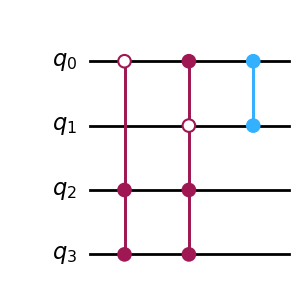

In [20]:
from qiskit.circuit.library import PhaseOracleGate

# Example 2: Phase Oracle for logical expressions
# Create an oracle that marks solutions to (a AND b) OR (c AND d)

logical_expr = "(a & b) | (c & d)"
oracle = PhaseOracleGate(logical_expr)
qc=QuantumCircuit(oracle.num_qubits)
qc.append(oracle, range(oracle.num_qubits))
print("\nPhase Oracle for expression:", logical_expr)
qc.decompose().draw('mpl')

### Template Circuits



Templates return circuits that compute the identity, they are mainly used at circuit optimization. 

- **NCT (Not-CNot-toffoli)** : use `XGate`, `CXGate`, `CCXGate`
- **Clifford** : use Cllifford Gates
- **RZX** : use `RZXGate`

In [ ]:
from qiskit.circuit.library.templates import template_nct_4b_1
from qiskit.quantum_info import Operator
import numpy as np

# Example 1: template_nct_4b_1 verification
template = template_nct_4b_1()
identity = np.identity(2 ** len(template.qubits), dtype=complex)
data = Operator(template).data
is_identity = np.allclose(data, identity)

print("\nTemplate Verification:")
print(f"template_nct_4b_1 is identity: {is_identity}")

print("\nTemplate Circuit (template_nct_4b_1):")
template.draw('mpl')

---

## Practice Questions

**1) When using Qiskit's circuit library, what is the main practical difference between using a component's `Gate` representation versus its `QuantumCircuit` representation ?**

A) Gate representations are faster to execute on hardware, while QuantumCircuit representations are better for simulation.

B) Gate representations are abstract mathematical operations optimized by the transpiler, while QuantumCircuit representations are concrete implementations.

C) Gate representations have more parameters, while QuantumCircuit representations are fixed.

D) QuantumCircuit representations only work in simulation, while Gate representations work on real hardware.

E) There is no functional difference; they can be used interchangeably in all cases.


***Answer:***
<Details>
<br/>
B) Gate representations are abstract mathematical operations optimized by the transpiler, while QuantumCircuit representations are concrete implementations.
</Details>

---

**2) Which of the following is a correct description of a template circuit used in transpiler optimizations?**

A) A set of quantum gates used for encoding classical data

B) A configuration file that describes backend coupling maps

C) A minimal rewrite rule circuit, where a pattern can be replaced with a shorter equivalent pattern

D) A circuit specifically designed to generate GHZ states


***Answer:***
<Details>
<br/>
C) Template circuits provide pattern-matching rules so the transpiler can replace inefficient gate sequences with optimized ones.

</Details>

---